<a href="https://colab.research.google.com/github/vesperding/ME5920-HW1/blob/main/HW1_ME5920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME5920 Homework 1

## 2.1 Images

In [1]:
import random
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from einops import rearrange

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Download MNIST
transform = transforms.ToTensor()
mnist_train = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# Build a 1,000-sample subset
subset_size = 1000
indices = torch.randperm(len(mnist_train))[:subset_size]

images_list, labels_list = [], []
for idx in indices:
    x, y = mnist_train[int(idx)]
    # x is [1, 28, 28]; remove channel to match the Hint input shape [1000, 28, 28]
    images_list.append(x.squeeze(0))
    labels_list.append(y)

images = torch.stack(images_list, dim=0)                 # [1000, 28, 28]
labels = torch.tensor(labels_list, dtype=torch.long)     # [1000]

print("Subset images shape:", images.shape)
print("Subset labels shape:", labels.shape)


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.15MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.13MB/s]


Subset images shape: torch.Size([1000, 28, 28])
Subset labels shape: torch.Size([1000])


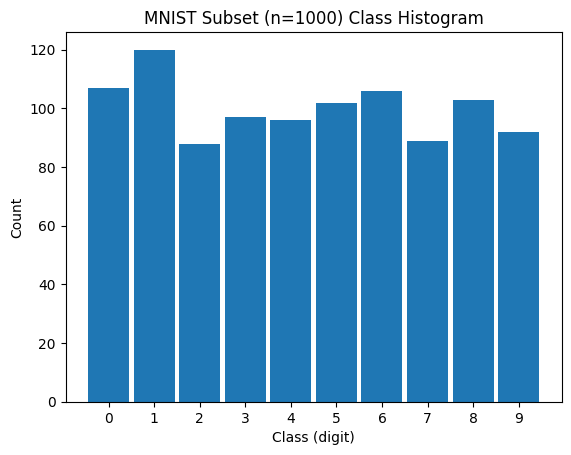

In [2]:
plt.figure()
plt.hist(labels.numpy(), bins=np.arange(11) - 0.5, rwidth=0.9)
plt.xticks(range(10))
plt.xlabel("Class (digit)")
plt.ylabel("Count")
plt.title("MNIST Subset (n=1000) Class Histogram")
plt.show()

In [3]:
batch_size = 25

# Hint target: [1000, 28, 28] -> [NumBatches, BatchSize, 1, 28, 28]
batched_images = rearrange(images, "(b n) h w -> b n 1 h w", n=batch_size)

print("Batched images shape:", batched_images.shape)  # Expected: [40, 25, 1, 28, 28]

Batched images shape: torch.Size([40, 25, 1, 28, 28])


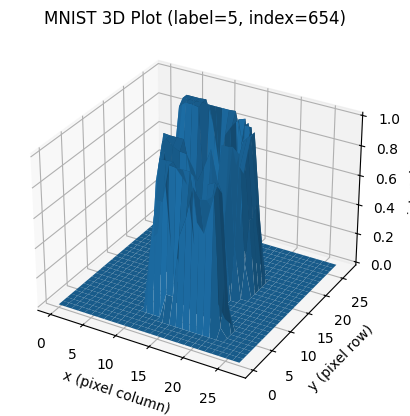

In [4]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

rand_i = random.randint(0, images.shape[0] - 1)
sample = images[rand_i].numpy()  # [28, 28] in [0, 1]
label = int(labels[rand_i].item())

h, w = sample.shape
X, Y = np.meshgrid(np.arange(w), np.arange(h))
Z = sample

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)

ax.set_title(f"MNIST 3D Plot (label={label}, index={rand_i})")
ax.set_xlabel("x (pixel column)")
ax.set_ylabel("y (pixel row)")
ax.set_zlabel("intensity")
plt.show()


## 2.2 Time Series

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/HW_ME5920/HW1/data/"

df = pd.read_csv(base_path + "energydata_complete.csv")

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df.set_index("date", inplace=True)

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


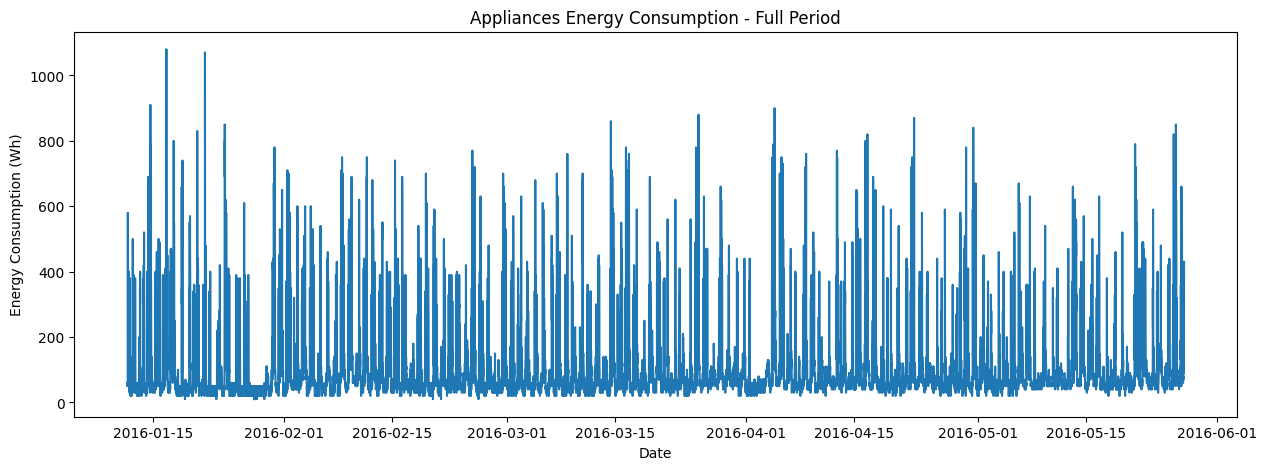

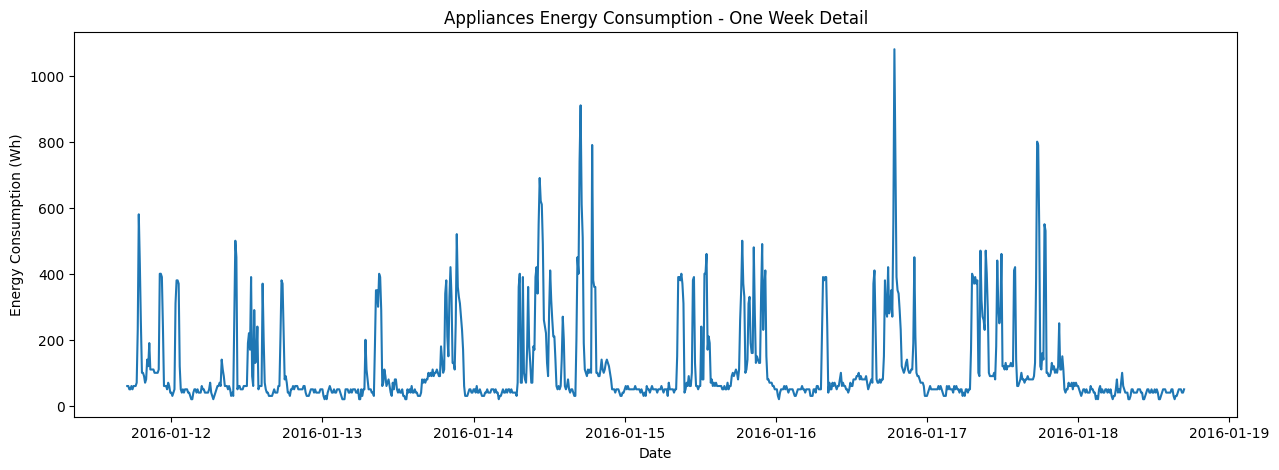

In [7]:
# Plot full period energy consumption
plt.figure(figsize=(15,5))
plt.plot(df.index, df["Appliances"])
plt.title("Appliances Energy Consumption - Full Period")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (Wh)")
plt.show()


# Select first week of data (7 days * 24 hours * 6 samples per hour)
one_week = df.iloc[:7*24*6]

plt.figure(figsize=(15,5))
plt.plot(one_week.index, one_week["Appliances"])
plt.title("Appliances Energy Consumption - One Week Detail")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (Wh)")
plt.show()

/tmp/ipython-input-3843593226.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weekly_hourly = one_week["Appliances"].resample("H").mean()


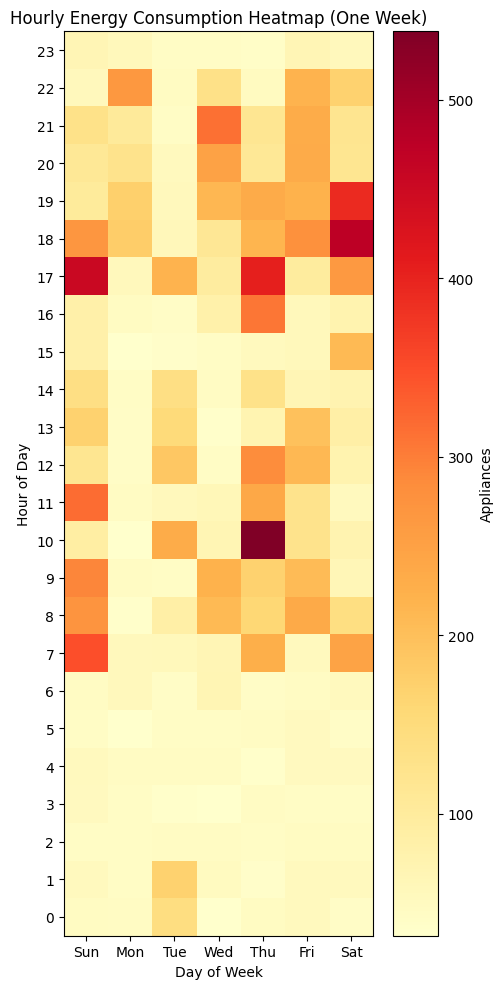

In [8]:

# Select one week of data (first 7 days)
one_week = df.iloc[:7*24*6]

# Resample to hourly average
weekly_hourly = one_week["Appliances"].resample("H").mean()

# Prepare dataframe
heatmap_df = weekly_hourly.to_frame()
heatmap_df["Hour"] = heatmap_df.index.hour
heatmap_df["Day"] = heatmap_df.index.day_name()

# Reorder days starting from Sunday
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday",
              "Thursday", "Friday", "Saturday"]

heatmap_df["Day"] = pd.Categorical(heatmap_df["Day"],
                                    categories=days_order,
                                    ordered=True)

# Create pivot table (Hour x Day)
pivot_table = heatmap_df.pivot(index="Hour",
                               columns="Day",
                               values="Appliances")

# Convert to numpy array
heatmap_data = pivot_table.values

# Plot heatmap
plt.figure(figsize=(5,10))

im = plt.imshow(heatmap_data,
                aspect="auto",
                origin="lower",
                cmap="YlOrRd")

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label("Appliances")

# Set axis labels
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")

# Set ticks
plt.xticks(ticks=range(7),
           labels=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])

plt.yticks(ticks=range(24))

# Add grid lines
plt.grid(False)

plt.title("Hourly Energy Consumption Heatmap (One Week)")

plt.tight_layout()
plt.show()


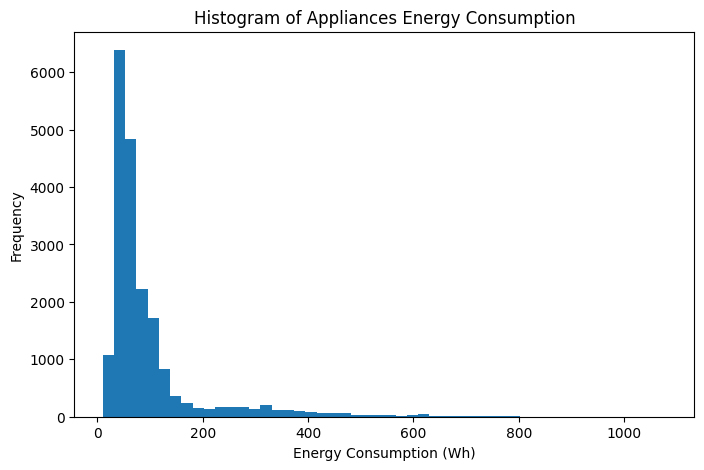

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df["Appliances"], bins=50)
plt.title("Histogram of Appliances Energy Consumption")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.show()

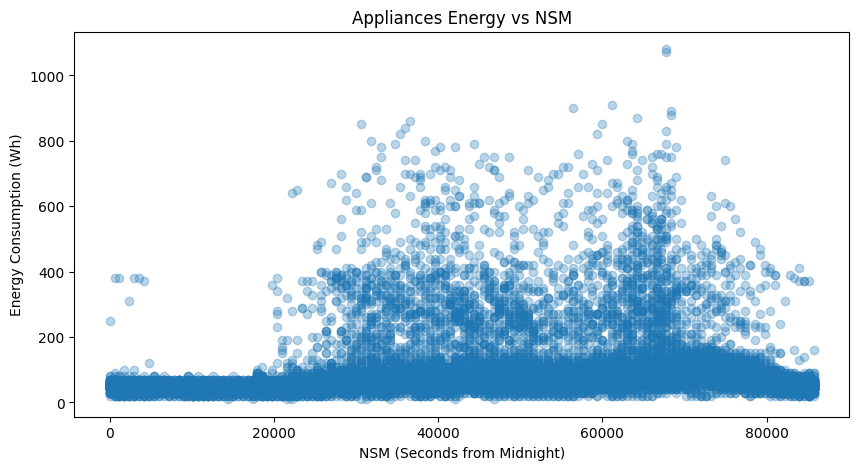

In [10]:
# Create NSM (Number of Seconds from Midnight)
df["NSM"] = (
    df.index.hour * 3600 +
    df.index.minute * 60 +
    df.index.second
)

# Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df["NSM"], df["Appliances"], alpha=0.3)
plt.title("Appliances Energy vs NSM")
plt.xlabel("NSM (Seconds from Midnight)")
plt.ylabel("Energy Consumption (Wh)")
plt.show()


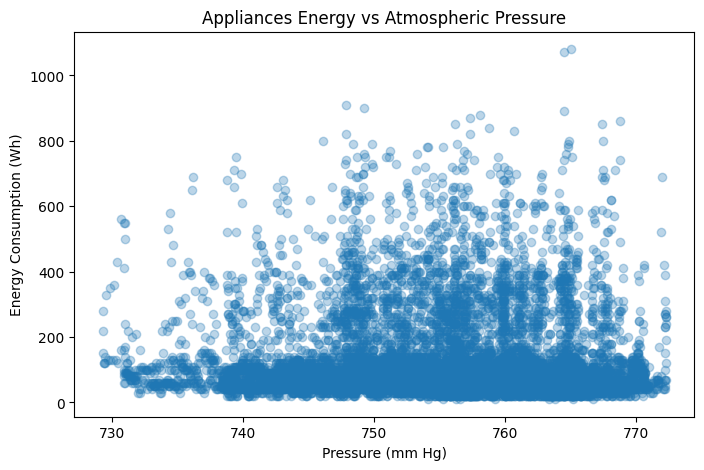

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df["Press_mm_hg"], df["Appliances"], alpha=0.3)
plt.title("Appliances Energy vs Atmospheric Pressure")
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Energy Consumption (Wh)")
plt.show()

To assess the primary drivers of appliance energy consumption, we examine its relationship with two variables: NSM (Number of Seconds from Midnight) and atmospheric pressure (Press_mm_hg). These two variables represent fundamentally different types of explanatory structure: temporal phase and meteorological condition.

The scatter plot of Appliances versus NSM reveals a pronounced intra-day structure. Energy consumption remains low and relatively stable during early morning hours, increases during daytime, and reaches elevated levels with greater variability in the evening period (approximately 17:00–21:00). This pattern is consistent across days, indicating that consumption is strongly governed by daily activity cycles. NSM effectively encodes the phase within a 24-hour period, and the observed structure suggests that appliance usage depends more on time-of-day position than on absolute chronological time. The systematic variation in both mean level and dispersion across NSM values indicates that intra-day periodicity is a dominant structural component of the series.

In contrast, the scatter plot of Appliances versus Press_mm_hg does not exhibit a clear structural pattern. The observations form a dispersed cloud across the pressure range (approximately 730–770 mmHg), with no evident monotonic or nonlinear trend. While atmospheric pressure may correlate indirectly with broader weather systems, its direct explanatory power appears limited when examined in isolation. Compared to the strong temporal phase effect captured by NSM, pressure does not induce a visible systematic shift in consumption levels.

Overall, the evidence suggests that appliance energy consumption is primarily structured by daily behavioral cycles rather than by short-term atmospheric pressure variation. NSM captures a recurring temporal mechanism, whereas pressure at least in univariate form and does not display comparable structural influence.

## 2.3 Multi-variate

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

columns = [
    "Frequency",
    "Angle_of_attack",
    "Chord_length",
    "Free_stream_velocity",
    "Suction_side_displacement_thickness",
    "Sound_pressure_level"
]

base_path = "/content/drive/MyDrive/HW_ME5920/HW1/data/"

df = pd.read_csv(base_path + "airfoil_self_noise.dat",
                 sep="\t",
                 names=columns)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1503, 6)


,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
stats_df = pd.DataFrame({
    "Mean": df.mean(),
    "Variance": df.var(),
    "Std_Deviation": df.std(),
    "Median": df.median(),
    "Kurtosis": df.kurt(),
    "Skewness": df.skew(),
    "Range": df.max() - df.min()
})

stats_df


,Mean,Variance,Std_Deviation,Median,Kurtosis,Skewness,Range
Frequency,2886.380572,9.938717e+06,3152.573137,1600.000000,5.708685,2.137084,19800.000000
Angle_of_attack,6.782302,3.502424e+01,5.918128,5.400000,-0.412951,0.689164,22.200000
Chord_length,0.136548,8.749868e-03,0.093541,0.101600,-1.037964,0.457457,0.279400
Free_stream_velocity,50.860745,2.425116e+02,15.572784,39.600000,-1.563951,0.235852,39.600000
Suction_side_displacement_thickness,0.011140,1.729287e-04,0.013150,0.004957,2.218903,1.702165,0.058011
Sound_pressure_level,124.835943,4.759146e+01,6.898657,125.721000,-0.314187,-0.418952,37.607000


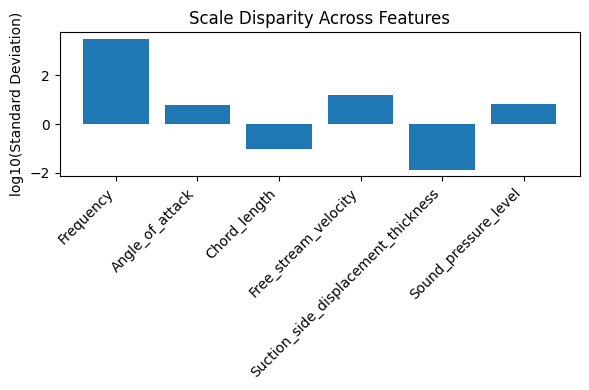

In [4]:
import matplotlib.pyplot as plt
import numpy as np

std_values = df.std()

plt.figure(figsize=(6,4))
plt.bar(std_values.index, np.log10(std_values))
plt.xticks(rotation=45, ha='right')
plt.ylabel("log10(Standard Deviation)")
plt.title("Scale Disparity Across Features")
plt.tight_layout()
plt.show()

# 3 Image Processing
## 3.1 Image pre-processing and transformation

In [15]:
# Cell 1: Imports + Drive mount + Paths
import os
import glob
import random
from pathlib import Path

import numpy as np
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# -----------------------------
# Configuration (Colab/Drive)
# -----------------------------
DRIVE_ROOT = Path("/content/drive/MyDrive")
HW_ROOT = DRIVE_ROOT / "HW_ME5920" / "HW1"

# MyDrive/HW_ME5920/HW1/data/Agricultural_Image_Analytics/leaves
DATA_DIR = HW_ROOT / "data" / "Agricultural_Image_Analytics" / "leaves"
OUTPUT_DIR = HW_ROOT / "data" / "Agricultural_Image_Analytics" / "outputs_leaf_image_processing"

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("DATA_DIR =", DATA_DIR)
print("OUTPUT_DIR =", OUTPUT_DIR)
print("DATA_DIR exists?", DATA_DIR.exists())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATA_DIR = /content/drive/MyDrive/HW_ME5920/HW1/data/Agricultural_Image_Analytics/leaves
OUTPUT_DIR = /content/drive/MyDrive/HW_ME5920/HW1/data/Agricultural_Image_Analytics/outputs_leaf_image_processing
DATA_DIR exists? True


Found 8 images.


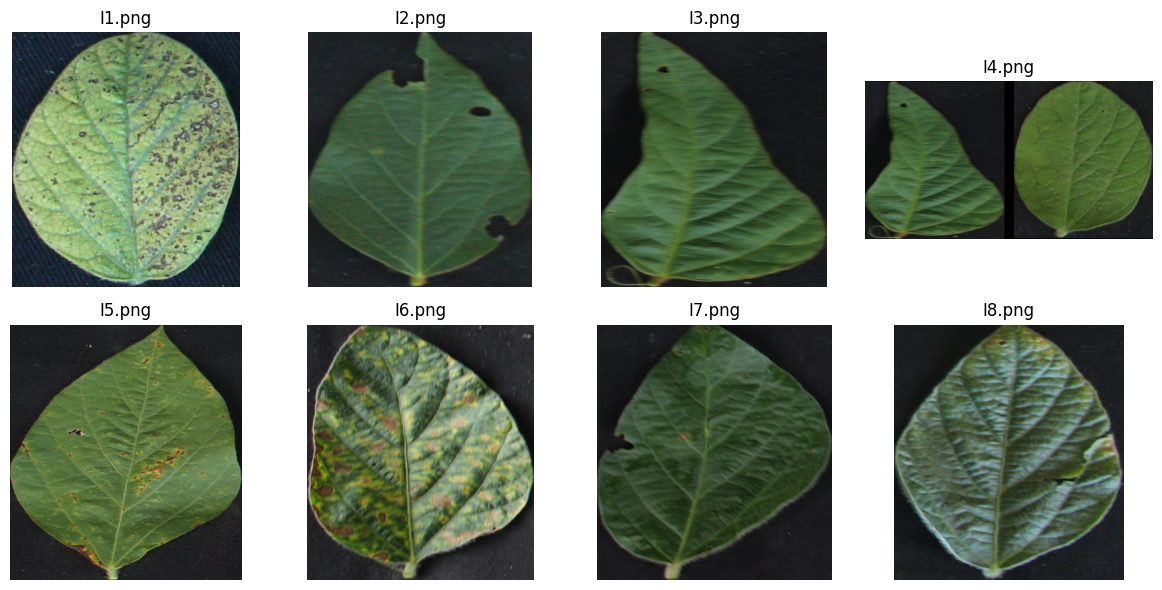

In [16]:
# Cell 2: Utilities + Load image paths + Preview
def list_image_files(folder, exts=("*.png", "*.jpg", "*.jpeg", "*.bmp", "*.tif", "*.tiff")):
    folder = str(folder)  # glob wants string
    files = []
    for e in exts:
        files.extend(glob.glob(os.path.join(folder, e)))
    return sorted(files)

def read_image_bgr(path):
    img = cv2.imread(str(path), cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError(f"Failed to read image: {path}")
    return img

image_paths = list_image_files(DATA_DIR)
print(f"Found {len(image_paths)} images.")

if len(image_paths) == 0:
    raise FileNotFoundError(
        f"No images found in {DATA_DIR}. "
        f"Please check your Drive folder: MyDrive/HW_ME5920/HW1/data/Agricultural_Image_Analytics/leaves"
    )

# Preview a few images
n_preview = min(8, len(image_paths))
plt.figure(figsize=(12, 6))
for i in range(n_preview):
    img_bgr = read_image_bgr(image_paths[i])
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 4, i + 1)
    plt.imshow(img_rgb)
    plt.title(Path(image_paths[i]).name)
    plt.axis("off")
plt.tight_layout()
plt.show()


Extracted patches: (160, 16, 16, 3)  (N, 16, 16, 3)


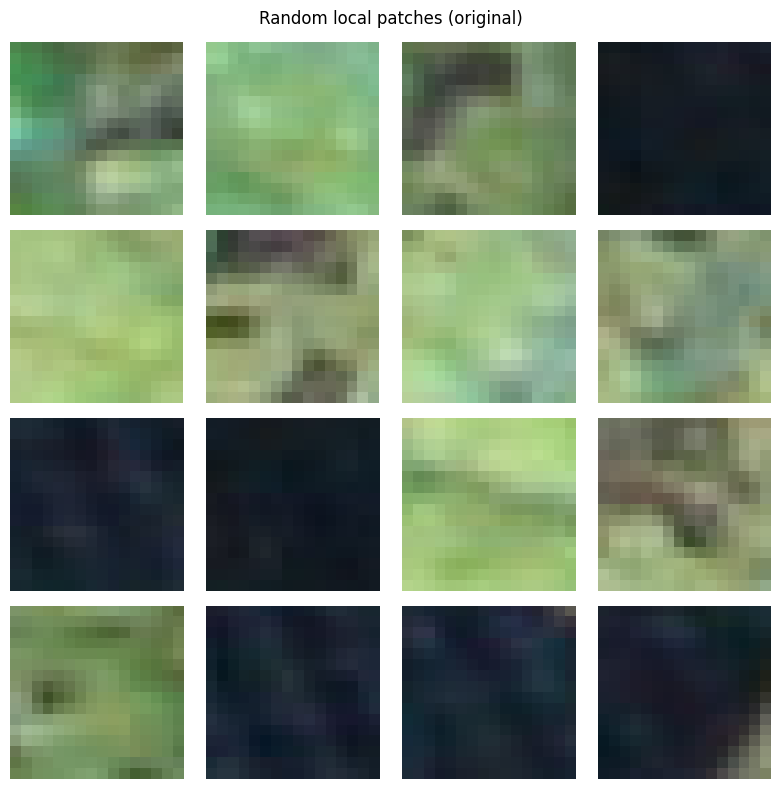

In [23]:
# Cell 3: Random patch extraction
PATCH_SIZE = 16           # Fixed local patch size (Task 2)
PATCHES_PER_IMAGE = 20   # How many random patches to sample from each image

def extract_random_patches(img_bgr, patch_size=64, n_patches=10):
    """
    Extract random square patches from an image.
    Returns patches in RGB float32 range [0, 1].
    """
    h, w = img_bgr.shape[:2]
    if h < patch_size or w < patch_size:
        # If image is smaller than patch_size, resize up (simple fallback)
        scale = patch_size / min(h, w)
        new_w = int(round(w * scale))
        new_h = int(round(h * scale))
        img_bgr = cv2.resize(img_bgr, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
        h, w = img_bgr.shape[:2]

    patches = []
    for _ in range(n_patches):
        y = np.random.randint(0, h - patch_size + 1)
        x = np.random.randint(0, w - patch_size + 1)
        patch_bgr = img_bgr[y:y+patch_size, x:x+patch_size]
        patch_rgb = cv2.cvtColor(patch_bgr, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
        patches.append(patch_rgb)
    return np.stack(patches, axis=0)

all_patches = []
for p in image_paths:
    img = read_image_bgr(p)
    patches = extract_random_patches(img, patch_size=PATCH_SIZE, n_patches=PATCHES_PER_IMAGE)
    all_patches.append(patches)

all_patches = np.concatenate(all_patches, axis=0)  # (N, H, W, 3)
print(f"Extracted patches: {all_patches.shape}  (N, {PATCH_SIZE}, {PATCH_SIZE}, 3)")

# Visualize some patches
n_show = min(16, all_patches.shape[0])
plt.figure(figsize=(8, 8))
for i in range(n_show):
    plt.subplot(4, 4, i + 1)
    plt.imshow(all_patches[i])
    plt.axis("off")
plt.suptitle("Random local patches (original)")
plt.tight_layout()
plt.show()


Generated augmented images: (100, 16, 16, 3)
Saved 100 augmented images to: /content/drive/MyDrive/HW_ME5920/HW1/data/Agricultural_Image_Analytics/outputs_leaf_image_processing/augmented_100


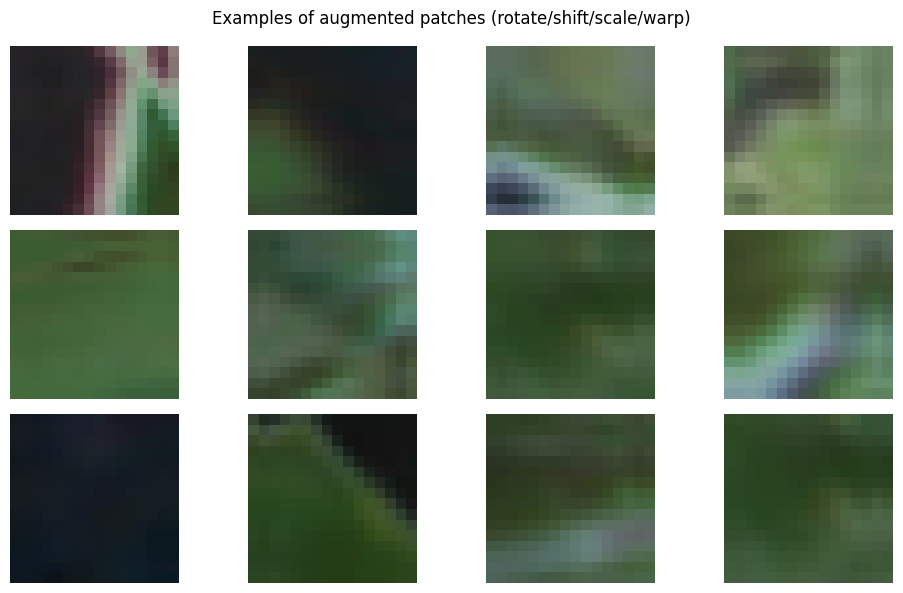

In [24]:
# Cell 4: Random affine + perspective warp augmentation + Save 100 images
def random_affine_and_warp(patch_rgb):
    """
    Apply random rotation, translation, scaling (affine) plus a mild perspective warp.
    Input: patch_rgb float32 in [0,1], shape (H,W,3)
    Output: transformed patch_rgb float32 in [0,1]
    """
    h, w = patch_rgb.shape[:2]
    img = (patch_rgb * 255.0).astype(np.uint8)

    # Random rotation and scaling
    angle = np.random.uniform(-25, 25)          # degrees
    scale = np.random.uniform(0.85, 1.15)
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Random translation
    tx = np.random.uniform(-0.10, 0.10) * w
    ty = np.random.uniform(-0.10, 0.10) * h
    M[:, 2] += [tx, ty]

    # Apply affine transform
    affine = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    # Mild perspective warp
    margin = 0.10 * min(h, w)
    src = np.float32([[0, 0], [w - 1, 0], [w - 1, h - 1], [0, h - 1]])

    def jitter(pt):
        return [
            pt[0] + np.random.uniform(-margin, margin),
            pt[1] + np.random.uniform(-margin, margin)
        ]

    dst = np.float32([jitter(src[0]), jitter(src[1]), jitter(src[2]), jitter(src[3])])
    P = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(affine, P, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    out = warped.astype(np.float32) / 255.0
    return out

AUGMENTED_COUNT = 100

# Generate augmented images from random patches
augmented = []
for i in range(AUGMENTED_COUNT):
    idx = np.random.randint(0, all_patches.shape[0])
    aug = random_affine_and_warp(all_patches[idx])
    augmented.append(aug)

augmented = np.stack(augmented, axis=0)
print(f"Generated augmented images: {augmented.shape}")

# Save augmented images
aug_dir = OUTPUT_DIR / "augmented_100"
aug_dir.mkdir(parents=True, exist_ok=True)

for i in range(AUGMENTED_COUNT):
    img = (augmented[i] * 255.0).clip(0, 255).astype(np.uint8)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(str(aug_dir / f"aug_{i:03d}.png"), img_bgr)

print(f"Saved {AUGMENTED_COUNT} augmented images to: {aug_dir}")

# Visualize a grid
plt.figure(figsize=(10, 6))
for i in range(min(12, AUGMENTED_COUNT)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(augmented[i])
    plt.axis("off")
plt.suptitle("Examples of augmented patches (rotate/shift/scale/warp)")
plt.tight_layout()
plt.show()


Fitting ZCA on 160 patches...
ZCA whitening done.
whitened_patches shape: (160, 16, 16, 3)


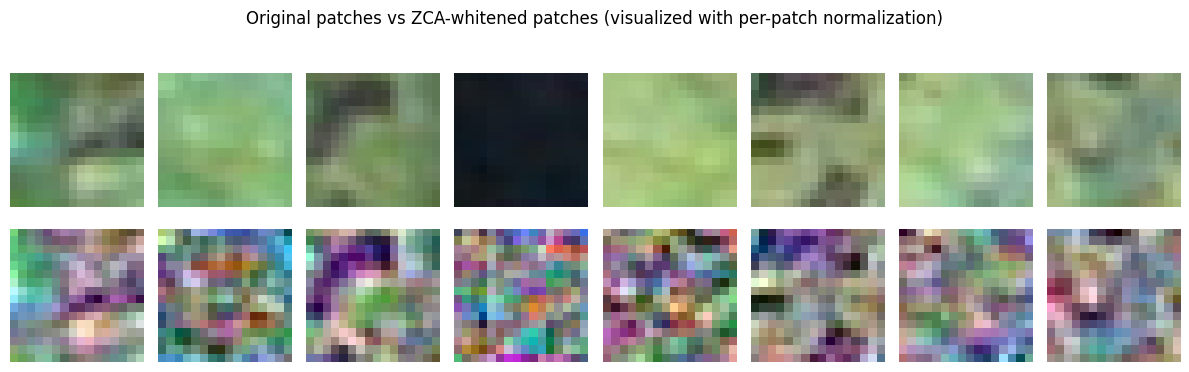

In [25]:
# Cell 5: ZCA whitening (fit on subset to avoid memory blowup)
def zca_whitening_fit(patches, epsilon=1e-5):
    """
    Fit ZCA whitening on patches.

    patches: float32 array, shape (N, H, W, C), values typically in [0,1]
    Returns: mean vector, whitening matrix
    """
    N, H, W, C = patches.shape
    X = patches.reshape(N, -1).astype(np.float64)

    mean = X.mean(axis=0, keepdims=True)
    Xc = X - mean

    cov = (Xc.T @ Xc) / N
    U, S, _ = np.linalg.svd(cov, full_matrices=False)
    W_zca = U @ np.diag(1.0 / np.sqrt(S + epsilon)) @ U.T
    return mean, W_zca

def zca_whitening_transform(patches, mean, W_zca):
    """
    Apply ZCA whitening using precomputed mean and whitening matrix.
    """
    N = patches.shape[0]
    X = patches.reshape(N, -1).astype(np.float64)
    Xc = X - mean
    Xw = Xc @ W_zca
    out = Xw.reshape(patches.shape).astype(np.float32)
    return out

max_fit_patches = min(2000, all_patches.shape[0])
fit_indices = np.random.choice(all_patches.shape[0], size=max_fit_patches, replace=False)
fit_patches = all_patches[fit_indices]

print(f"Fitting ZCA on {fit_patches.shape[0]} patches...")

mean_vec, W_zca = zca_whitening_fit(fit_patches, epsilon=1e-5)
whitened_patches = zca_whitening_transform(all_patches, mean_vec, W_zca)

print("ZCA whitening done.")
print(f"whitened_patches shape: {whitened_patches.shape}")

# Visualize original vs whitened
k = 8
plt.figure(figsize=(12, 4))
for i in range(k):
    plt.subplot(2, k, i + 1)
    plt.imshow(all_patches[i])
    plt.axis("off")
    if i == 0:
        plt.ylabel("Original", rotation=0, labelpad=30)

for i in range(k):
    plt.subplot(2, k, k + i + 1)
    wp = whitened_patches[i]
    wp_norm = (wp - wp.min()) / (wp.max() - wp.min() + 1e-8)  # visualization only
    plt.imshow(wp_norm)
    plt.axis("off")
    if i == 0:
        plt.ylabel("Whitened", rotation=0, labelpad=30)

plt.suptitle("Original patches vs ZCA-whitened patches (visualized with per-patch normalization)")
plt.tight_layout()
plt.show()


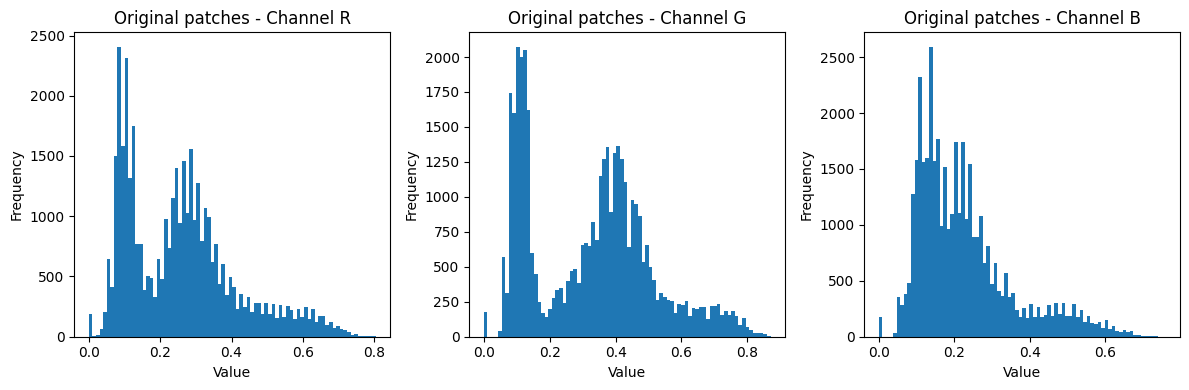

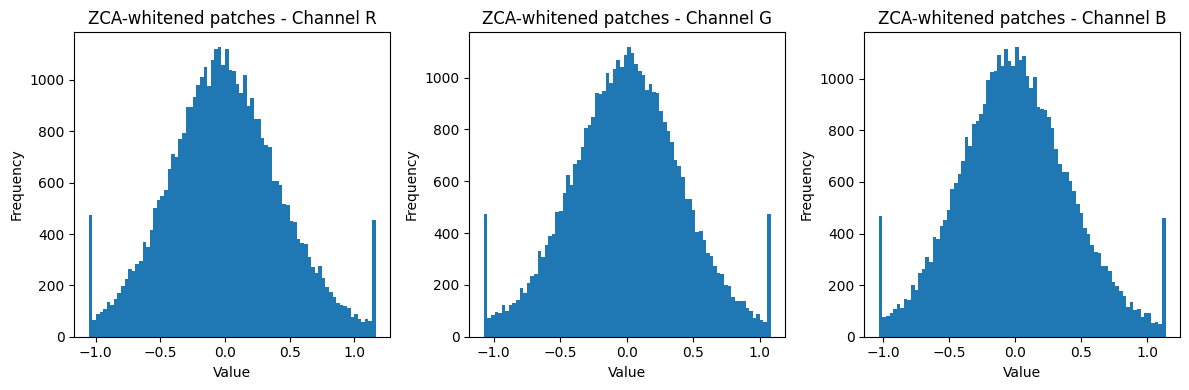

In [26]:
# Cell 6: Channel distributions (original vs whitened)
def plot_channel_distributions(patches, title, bins=80, clip_percentile=None):
    """
    Plot channel-by-channel value distributions.
    patches: (N,H,W,3)
    clip_percentile: if provided (e.g. 99), clip values to percentile range for better visualization
    """
    X = patches.reshape(-1, 3)

    if clip_percentile is not None:
        lo = np.percentile(X, 100 - clip_percentile, axis=0)
        hi = np.percentile(X, clip_percentile, axis=0)
        X = np.clip(X, lo, hi)

    plt.figure(figsize=(12, 4))
    channel_names = ["R", "G", "B"]
    for c in range(3):
        plt.subplot(1, 3, c + 1)
        plt.hist(X[:, c], bins=bins)
        plt.title(f"{title} - Channel {channel_names[c]}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_channel_distributions(all_patches, "Original patches", bins=80)
plot_channel_distributions(whitened_patches, "ZCA-whitened patches", bins=80, clip_percentile=99)


## 3.2 Image Segmentation

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os
in_dir = "/content/drive/MyDrive/HW_ME5920/HW1/data/Agricultural_Image_Analytics"
print("in_dir exists?", os.path.exists(in_dir))
print("top files:", os.listdir(in_dir)[:20])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
in_dir exists? True
top files: ['1.JPG', '2.JPG', '5.JPG', '4.JPG', '3.JPG', 'leaves', 'outputs_leaf_image_processing']


In [10]:
# ============================================================
#   6x6 subplot bbox extraction + PPT-debug figures
#   A) Empty decision is POSTERIOR.
#   B) Always draw 36 boxes (fallback boxes drawn too) -> matches assignment requirement.
#   C) Big-canopy partial bbox is fixed via constrained growing (seed -> low-thr region).
#   D) Keep center-prior to prevent neighbor overflow in missing-plant cells.
#
#   Added (PPT/debug outputs, ZERO impact on algorithm):
#   1) Save whiteboard mask:     _debug/{img}_whiteboard_mask.png
#   2) Save ROI RGB + grid:      _debug/{img}_roi_grid_rgb.png
#   3) Save energy heatmap+grid: _debug/{img}_energy_grid.png
#   4) Save overview flow image: _debug/{img}_overview_flow.jpg
# ============================================================

import os, glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ----------------------------
# Utils
# ----------------------------
def imread_bgr(path: str):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Cannot read image: {path}")
    return img

def safe_mkdir(p: str):
    os.makedirs(p, exist_ok=True)

def clamp_int(v, lo, hi):
    return int(max(lo, min(hi, v)))

def normalize01(x: np.ndarray, eps=1e-8):
    x = x.astype(np.float32)
    mn, mx = float(x.min()), float(x.max())
    if mx - mn < eps:
        return np.zeros_like(x, dtype=np.float32)
    return (x - mn) / (mx - mn + eps)

def otsu_threshold_u8(u8: np.ndarray):
    thr, mask = cv2.threshold(u8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thr, mask

def _sigmoid01(z):
    z = np.clip(z, -20.0, 20.0)
    return 1.0 / (1.0 + np.exp(-z))

def _smooth_1d(x, k=21):
    k = int(k)
    if k < 3:
        return x.astype(np.float32)
    if k % 2 == 0:
        k += 1
    ker = np.ones(k, dtype=np.float32) / float(k)
    return np.convolve(x.astype(np.float32), ker, mode="same")

# ----------------------------
# White mask
# ----------------------------
def white_mask_lab(img_bgr, L_min=215, chroma_max=18):
    """
    Detect bright & low-chroma pixels (white paper/board).
    True means white-like.
    """
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    L = lab[:, :, 0].astype(np.float32)
    a = lab[:, :, 1].astype(np.float32) - 128.0
    b = lab[:, :, 2].astype(np.float32) - 128.0
    chroma = np.sqrt(a*a + b*b)
    return (L >= float(L_min)) & (chroma <= float(chroma_max))


def green_pixel_mask(img_bgr,
                     H_lo=12, H_hi=55,
                     S_min=0.10, V_min=0.08,
                     exg_min=0.00):
    """
    A conservative green mask for *pixels*, used to prevent white-paper pollution.
    """
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    H = hsv[:, :, 0].astype(np.float32)
    S = hsv[:, :, 1].astype(np.float32) / 255.0
    V = hsv[:, :, 2].astype(np.float32) / 255.0
    exg = exg_score(img_bgr)
    return (H >= H_lo) & (H <= H_hi) & (S >= S_min) & (V >= V_min) & (exg >= exg_min)

# ----------------------------
# Vegetation energy
# ----------------------------
def exg_score(img_bgr: np.ndarray):
    b = img_bgr[:, :, 0].astype(np.float32)
    g = img_bgr[:, :, 1].astype(np.float32)
    r = img_bgr[:, :, 2].astype(np.float32)
    s = r + g + b + 1e-6
    rn, gn, bn = r/s, g/s, b/s
    return 2.0*gn - rn - bn   # raw ExG

def lab_a_green_score(img_bgr: np.ndarray):
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    a = lab[:, :, 1].astype(np.float32)  # 0..255, greener -> smaller
    am = float(np.median(a))
    return (am - a)

def veg_energy(img_bgr: np.ndarray):
    e1 = exg_score(img_bgr)
    e2 = lab_a_green_score(img_bgr)
    return 0.65 * e1 + 0.35 * normalize01(e2)

# ----------------------------
# Stage A: ROI from whiteboards
# ----------------------------
def detect_whiteboards_candidates(img_bgr):
    H, W = img_bgr.shape[:2]
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    L = lab[:, :, 0].astype(np.float32)
    a = lab[:, :, 1].astype(np.float32) - 128.0
    b = lab[:, :, 2].astype(np.float32) - 128.0
    chroma = np.sqrt(a*a + b*b)

    Lq = float(np.quantile(L, 0.985))
    L_thr = max(200.0, min(240.0, Lq))

    Cq = float(np.quantile(chroma, 0.20))
    C_thr = float(np.clip(Cq + 10.0, 12.0, 26.0))

    mask = ((L >= L_thr) & (chroma <= C_thr)).astype(np.uint8) * 255

    k = max(3, int(round(min(H, W) * 0.004)))
    if k % 2 == 0:
        k += 1
    ker = cv2.getStructuringElement(cv2.MORPH_RECT, (k, k))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, ker, iterations=1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, ker, iterations=2)

    nlab, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    bboxes = []
    for i in range(1, nlab):
        x, y, w, h, area = stats[i]
        area = float(area)
        if area < 0.00025 * H * W:
            continue
        if area > 0.40 * H * W:
            continue
        ar = w / max(1, h)
        if ar < 0.25 or ar > 4.0:
            continue
        roi = mask[y:y+h, x:x+w]
        fill = float((roi > 0).mean())
        if fill < 0.18:
            continue
        bboxes.append((int(x), int(y), int(w), int(h)))
    return bboxes, mask

def pick_four_boards(bboxes, img_shape):
    H, W = img_shape[:2]
    if len(bboxes) < 3:
        return None
    min_dim = min(H, W)
    filtered = []
    for x, y, w, h in bboxes:
        if max(w, h) < 0.06 * min_dim:
            continue
        if max(w, h) > 0.60 * min_dim:
            continue
        filtered.append((x, y, w, h))
    if len(filtered) < 3:
        filtered = bboxes
    centers = [(x + w/2.0, y + h/2.0, (x, y, w, h)) for (x, y, w, h) in filtered]
    top = min(centers, key=lambda t: t[1])[2]
    bottom = max(centers, key=lambda t: t[1])[2]
    left = min(centers, key=lambda t: t[0])[2]
    right = max(centers, key=lambda t: t[0])[2]
    return {"top": top, "bottom": bottom, "left": left, "right": right}

def compute_roi_from_boards(boards, img_shape):
    H, W = img_shape[:2]
    lx, ly, lw, lh = boards["left"]
    rx, ry, rw, rh = boards["right"]
    tx, ty, tw, th = boards["top"]
    bx, by, bw, bh = boards["bottom"]

    margin = int(round(0.012 * min(H, W)))
    margin = max(8, margin)

    left_edge = lx + lw + margin
    right_edge = rx - margin
    top_edge = ty + th + margin
    bottom_edge = by - margin

    left_edge = int(np.clip(left_edge, 0, W-1))
    right_edge = int(np.clip(right_edge, 0, W))
    top_edge = int(np.clip(top_edge, 0, H-1))
    bottom_edge = int(np.clip(bottom_edge, 0, H))

    if right_edge <= left_edge or bottom_edge <= top_edge:
        return None
    return (left_edge, top_edge, right_edge - left_edge, bottom_edge - top_edge)

def refine_roi_by_veg_energy_safe(img_bgr, roi):
    x, y, w, h = roi
    roi_img = img_bgr[y:y+h, x:x+w]
    E = veg_energy(roi_img)
    E01 = normalize01(E)

    base = float(np.quantile(E01, 0.60))
    X = np.clip(E01 - base, 0.0, None)
    if float(X.sum()) < 1e-6:
        return roi

    px = X.sum(axis=0) + 1e-6
    py = X.sum(axis=1) + 1e-6
    cx = np.cumsum(px) / px.sum()
    cy = np.cumsum(py) / py.sum()

    xL = int(np.searchsorted(cx, 0.01))
    xR = int(np.searchsorted(cx, 0.99))
    yT = int(np.searchsorted(cy, 0.01))
    yB = int(np.searchsorted(cy, 0.99))

    pad = int(round(0.02 * min(w, h)))
    pad = max(6, pad)
    xL = clamp_int(xL - pad, 0, w-1)
    xR = clamp_int(xR + pad, 0, w)
    yT = clamp_int(yT - pad, 0, h-1)
    yB = clamp_int(yB + pad, 0, h)

    nw, nh = (xR - xL), (yB - yT)
    if nw < 0.88 * w or nh < 0.88 * h:
        return roi
    if xR <= xL or yB <= yT:
        return roi
    return (x + xL, y + yT, nw, nh)

def expand_roi(roi, img_shape, expand_ratio=0.02):
    x, y, w, h = roi
    H, W = img_shape[:2]
    dx = int(round(expand_ratio * w))
    dy = int(round(expand_ratio * h))
    x0 = max(0, x - dx)
    y0 = max(0, y - dy)
    x1 = min(W, x + w + dx)
    y1 = min(H, y + h + dy)
    if x1 <= x0 + 10 or y1 <= y0 + 10:
        return roi
    return (x0, y0, x1 - x0, y1 - y0)

# ----------------------------
# Stage B: grid
# ----------------------------
def kmeans_1d_weighted(x, w, k=6, iters=40, seed=0):
    x = x.astype(np.float32)
    w = np.maximum(w.astype(np.float32), 0.0) + 1e-6
    qs = np.linspace(0.08, 0.92, k)
    centers = np.quantile(x, qs).astype(np.float32)
    for _ in range(iters):
        d = np.abs(x[:, None] - centers[None, :])
        lab = np.argmin(d, axis=1)
        newc = centers.copy()
        for j in range(k):
            idx = (lab == j)
            if not np.any(idx):
                continue
            ww = w[idx]
            newc[j] = float((x[idx] * ww).sum() / ww.sum())
        centers = newc
    centers.sort()
    return centers

def find_grid_centers_from_veg(roi_img_bgr, n=6):
    E01 = normalize01(veg_energy(roi_img_bgr))
    base = float(np.quantile(E01, 0.55))
    X = np.clip(E01 - base, 0.0, None)
    thr = float(np.quantile(X[X > 0], 0.75)) if np.any(X > 0) else 0.0
    ys, xs = np.where(X >= thr)
    if len(xs) < 120:
        return None, None, False, 0.0
    weights = X[ys, xs].astype(np.float32)
    xs_cent = kmeans_1d_weighted(xs.astype(np.float32), weights, k=n, seed=11)
    ys_cent = kmeans_1d_weighted(ys.astype(np.float32), weights, k=n, seed=22)
    dx = np.diff(xs_cent); dy = np.diff(ys_cent)
    sep = float(min(dx.min(initial=0.0), dy.min(initial=0.0)))
    span = float(min(xs_cent.max() - xs_cent.min() + 1e-6, ys_cent.max() - ys_cent.min() + 1e-6))
    q = sep / (span / n + 1e-6)
    ok = (q >= 0.35)
    return xs_cent, ys_cent, ok, q

def uniform_centers(n, L):
    return np.linspace(L*0.12, L*0.88, n).astype(np.float32)

def centers_to_cell_bounds(centers, L):
    c = np.sort(centers.astype(np.float32))
    n = len(c)
    mids = (c[:-1] + c[1:]) / 2.0
    bounds = []
    for i in range(n):
        if i == 0:
            left = 0.0
            right = mids[0]
        elif i == n - 1:
            left = mids[-1]
            right = float(L)
        else:
            left = mids[i-1]
            right = mids[i]
        left = float(np.clip(left, 0.0, L - 1.0))
        right = float(np.clip(right, 1.0, float(L)))
        if right <= left + 3:
            right = min(float(L), left + max(4.0, L / n))
        bounds.append((int(round(left)), int(round(right))))
    out = []
    cur = 0
    for i, (a, b) in enumerate(bounds):
        a = max(a, cur)
        if i == n - 1:
            b = L
        b = max(b, a + 4)
        b = min(b, L)
        out.append((a, b))
        cur = b
    out[-1] = (out[-1][0], L)
    return out

def snap_bounds_to_soil_valleys(E01_roi, x_bounds, y_bounds,
                               band_ratio=0.70,
                               search_ratio=0.10,
                               max_shift_ratio=0.18):
    H, W = E01_roi.shape[:2]
    soil = 1.0 - np.clip(E01_roi.astype(np.float32), 0.0, 1.0)

    band_h = int(round(band_ratio * H))
    y0b = (H - band_h) // 2
    y1b = y0b + band_h
    col = soil[y0b:y1b, :].sum(axis=0)
    col_s = _smooth_1d(col, k=max(11, (int(0.03 * W) | 1)))

    band_w = int(round(band_ratio * W))
    x0b = (W - band_w) // 2
    x1b = x0b + band_w
    row = soil[:, x0b:x1b].sum(axis=1)
    row_s = _smooth_1d(row, k=max(11, (int(0.03 * H) | 1)))

    def snap_1d(arr_s, b, cell_len):
        win = int(round(search_ratio * cell_len))
        win = max(8, min(win, 60))
        L = max(1, b - win)
        R = min(len(arr_s) - 2, b + win)
        b2 = int(L + np.argmax(arr_s[L:R+1]))
        max_shift = int(round(max_shift_ratio * cell_len))
        if abs(b2 - b) > max_shift:
            b2 = b + int(np.sign(b2 - b) * max_shift)
        return b2

    xb = [0]
    for i in range(5):
        b = x_bounds[i][1]
        cell_len = max(10, x_bounds[i][1] - x_bounds[i][0])
        xb.append(snap_1d(col_s, b, cell_len))
    xb.append(W)
    xb = np.clip(np.array(xb, dtype=int), 0, W)
    xb[0] = 0
    xb[-1] = W

    outx = []
    cur = 0
    for i in range(6):
        a = max(cur, int(xb[i]))
        b = int(xb[i+1])
        if i == 5:
            b = W
        b = max(b, a + 12)
        b = min(b, W)
        outx.append((a, b))
        cur = b
    outx[-1] = (outx[-1][0], W)

    yb = [0]
    for j in range(5):
        b = y_bounds[j][1]
        cell_len = max(10, y_bounds[j][1] - y_bounds[j][0])
        yb.append(snap_1d(row_s, b, cell_len))
    yb.append(H)
    yb = np.clip(np.array(yb, dtype=int), 0, H)
    yb[0] = 0
    yb[-1] = H

    outy = []
    cur = 0
    for j in range(6):
        a = max(cur, int(yb[j]))
        b = int(yb[j+1])
        if j == 5:
            b = H
        b = max(b, a + 12)
        b = min(b, H)
        outy.append((a, b))
        cur = b
    outy[-1] = (outy[-1][0], H)

    return outx, outy

# ----------------------------
# Stage C: per-cell mask + bbox
# ----------------------------
def cell_mask_from_energy(E01_cell, open_close_k):
    E01c = normalize01(E01_cell)
    E8 = (255.0 * E01c).astype(np.uint8)

    thr, _ = otsu_threshold_u8(E8)
    q80 = int(np.quantile(E8, 0.80))
    thr2 = int(np.clip(min(int(round(thr * 0.90)), q80), 20, 255))
    m = (E8 >= thr2).astype(np.uint8) * 255

    ker = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (open_close_k, open_close_k))
    m = cv2.morphologyEx(m, cv2.MORPH_OPEN, ker, iterations=1)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, ker, iterations=1)
    return m, E01c

def component_border_touch_ratio(comp_bool):
    h, w = comp_bool.shape[:2]
    if h == 0 or w == 0:
        return 1.0
    border = np.zeros((h, w), dtype=bool)
    border[0, :] = True
    border[-1, :] = True
    border[:, 0] = True
    border[:, -1] = True
    area = float(comp_bool.sum()) + 1e-6
    return float((comp_bool & border).sum()) / area

def _green_hue_ratio(hsv, comp_bool):
    H = hsv[:, :, 0].astype(np.float32)
    green = (H >= 12) & (H <= 55)
    num = float((green & comp_bool).sum())
    den = float(comp_bool.sum()) + 1e-6
    return num / den

def component_bbox_from_mask(mask_bool):
    ys, xs = np.where(mask_bool)
    if len(xs) == 0:
        return None
    x0 = int(xs.min()); x1 = int(xs.max()) + 1
    y0 = int(ys.min()); y1 = int(ys.max()) + 1
    return (x0, y0, x1 - x0, y1 - y0)

def cell_best_component_bbox_local(roi_img_bgr, E01_roi,
                                  x0, y0, x1, y1,
                                  min_area,
                                  cell_score_threshold,
                                  border_touch_max=0.30,
                                  center_win_ratio=0.60,
                                  comp_center_min_ratio=0.16,
                                  center_gamma=1.6,
                                  empty_e_mean_thr=0.07,
                                  empty_e_q90_thr=0.13,
                                  empty_score_floor_ratio=0.55,
                                  grow_low_quantile=0.20,
                                  grow_min_thr=0.10,
                                  grow_max_thr=0.28):
    """
    Returns (bbox_local, score).
    """
    E01_cell = E01_roi[y0:y1, x0:x1]
    if E01_cell.size == 0:
        return None, 0.0

    cell_bgr = roi_img_bgr[y0:y1, x0:x1]
    ch, cw = E01_cell.shape[:2]

    ww = max(6, int(round(center_win_ratio * cw)))
    hh = max(6, int(round(center_win_ratio * ch)))
    cx0 = (cw - ww) // 2
    cy0 = (ch - hh) // 2
    cx1 = cx0 + ww
    cy1 = cy0 + hh

    E01c_full = normalize01(E01_cell)
    E_center = E01c_full[cy0:cy1, cx0:cx1]
    e_mean = float(E_center.mean()) if E_center.size else 0.0
    e_q90  = float(np.quantile(E_center, 0.90)) if E_center.size else 0.0
    empty_suspect = (e_mean < empty_e_mean_thr) and (e_q90 < empty_e_q90_thr)

    k = max(3, int(round(0.06 * min(ch, cw))))
    if k % 2 == 0:
        k += 1
    mask_u8, E01c = cell_mask_from_energy(E01_cell, open_close_k=k)
    nlab, labels, stats, _ = cv2.connectedComponentsWithStats(mask_u8, connectivity=8)
    if nlab <= 1:
        return None, 0.0

    exg_raw = exg_score(cell_bgr)
    lab = cv2.cvtColor(cell_bgr, cv2.COLOR_BGR2LAB)
    a = lab[:, :, 1].astype(np.float32)
    hsv = cv2.cvtColor(cell_bgr, cv2.COLOR_BGR2HSV)
    S = hsv[:, :, 1].astype(np.float32) / 255.0
    V = hsv[:, :, 2].astype(np.float32) / 255.0

    center_mask = np.zeros((ch, cw), dtype=bool)
    center_mask[cy0:cy1, cx0:cx1] = True

    best = None
    best_score = 0.0
    best_comp = None

    comp_center_min_ratio_eff = comp_center_min_ratio
    if e_q90 < 0.20:
        comp_center_min_ratio_eff = max(0.10, 0.75 * comp_center_min_ratio)

    for lab_i in range(1, nlab):
        x, y, w, h, area = stats[lab_i]
        area = int(area)
        if area < min_area:
            continue

        comp = (labels == lab_i)
        if not np.any(comp):
            continue

        area_comp = float(comp.sum()) + 1e-6
        r_center = float((comp & center_mask).sum()) / area_comp
        if r_center < comp_center_min_ratio_eff:
            continue

        mean_e = float(E01c[comp].mean())
        touch = component_border_touch_ratio(comp)
        excess = max(0.0, touch - border_touch_max)
        pen_touch = float(np.exp(-6.0 * excess))

        mean_exg = float(exg_raw[comp].mean())
        mean_a   = float(a[comp].mean())
        mean_s   = float(S[comp].mean())
        mean_v   = float(V[comp].mean())
        hue_g    = float(_green_hue_ratio(hsv, comp))

        conf_exg = float(_sigmoid01((mean_exg - 0.02) / 0.06))
        conf_a   = float(_sigmoid01((135.0 - mean_a) / 6.0))
        conf_h   = float(_sigmoid01((hue_g - 0.35) / 0.10))
        conf_s   = float(_sigmoid01((mean_s - 0.18) / 0.06))
        conf_v   = float(_sigmoid01((mean_v - 0.22) / 0.06))
        veg_conf = conf_exg * conf_a * conf_h * conf_s * conf_v

        if (hue_g < 0.18) and (mean_a > 142.0):
            continue

        center_prior = float(np.power(r_center, center_gamma))
        score = (mean_e * np.sqrt(float(area))) * (1.0 - 0.8 * touch) * pen_touch * veg_conf * center_prior

        if score > best_score:
            best_score = score
            best = (x0 + int(x), y0 + int(y), int(w), int(h))
            best_comp = comp.copy()

    if empty_suspect:
        if (best is None) or (best_score < empty_score_floor_ratio * cell_score_threshold):
            return None, float(best_score)

    if best is None:
        return None, 0.0

    seed = best_comp
    comp_vals = E01c_full[seed]
    if comp_vals.size > 0:
        thr_low = float(np.quantile(comp_vals, grow_low_quantile))
    else:
        thr_low = 0.18
    thr_low = float(np.clip(thr_low, grow_min_thr, grow_max_thr))

    allow = (E01c_full >= thr_low)
    wmask = white_mask_lab(cell_bgr)
    allow = allow & (~wmask)

    grown = seed.copy()
    ker = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    for _ in range(45):
        dil = (cv2.dilate(grown.astype(np.uint8) * 255, ker, iterations=1) > 0)
        new_grown = (dil & allow) | grown
        if new_grown.sum() == grown.sum():
            break
        grown = new_grown

    ker2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    grown2 = (cv2.dilate(grown.astype(np.uint8) * 255, ker2, iterations=1) > 0)
    grown2 = (grown2 & allow) | grown

    bb_g = component_bbox_from_mask(grown2)
    if bb_g is not None:
        gx, gy, gw, gh = bb_g
        best = (x0 + gx, y0 + gy, gw, gh)

    return best, float(best_score)

def fallback_bbox_in_cell(x0, y0, x1, y1):
    cx = (x0 + x1) / 2.0
    cy = (y0 + y1) / 2.0
    w = 0.60 * (x1 - x0)
    h = 0.60 * (y1 - y0)
    x = int(cx - w/2)
    y = int(cy - h/2)
    return (x, y, int(w), int(h))

def fallback_bbox_from_energy_peak(E01_roi, x0, y0, x1, y1,
                                   q=0.88, min_thr=0.18,
                                   min_frac=0.35, max_frac=0.75):
    """
    Fallback bbox guided by energy peak inside the cell.
    """
    cell = E01_roi[y0:y1, x0:x1]
    if cell.size == 0:
        return fallback_bbox_in_cell(x0, y0, x1, y1)

    E = normalize01(cell)
    thr = float(np.quantile(E, q))
    thr = max(thr, min_thr)

    ys, xs = np.where(E >= thr)
    if len(xs) < 10:
        return fallback_bbox_in_cell(x0, y0, x1, y1)

    w = E[ys, xs].astype(np.float32) + 1e-6
    cx = float((xs * w).sum() / w.sum())
    cy = float((ys * w).sum() / w.sum())

    dx = float(np.sqrt(((xs - cx) ** 2 * w).sum() / w.sum()))
    dy = float(np.sqrt(((ys - cy) ** 2 * w).sum() / w.sum()))

    cell_w = float(x1 - x0)
    cell_h = float(y1 - y0)

    bw = float(np.clip(6.0 * dx, min_frac * cell_w, max_frac * cell_w))
    bh = float(np.clip(6.0 * dy, min_frac * cell_h, max_frac * cell_h))

    bx = int(round(x0 + cx - bw / 2.0))
    by = int(round(y0 + cy - bh / 2.0))
    return (bx, by, int(round(bw)), int(round(bh)))

def clamp_bbox_to_cell(bbox, x0, y0, x1, y1, pad_ratio=0.05):
    bx, by, bw, bh = bbox
    cell_w = (x1 - x0)
    cell_h = (y1 - y0)
    pad = int(round(pad_ratio * min(cell_w, cell_h)))
    pad = max(2, pad)
    xa = max(x0, bx - pad)
    ya = max(y0, by - pad)
    xb = min(x1, bx + bw + pad)
    yb = min(y1, by + bh + pad)
    if xb <= xa + 6 or yb <= ya + 6:
        return fallback_bbox_in_cell(x0, y0, x1, y1)
    return (xa, ya, xb - xa, yb - ya)

# ----------------------------
# PPT/debug visualization helpers
# ----------------------------
def draw_flow_arrows(img_bgr, roi=None):
    """
    Add a simple 3-step 'Boards -> ROI -> Grid' flow overlay to an annotated image.
    Coordinates are relative; it is intended for slides, not for precise geometry debugging.
    """
    H, W = img_bgr.shape[:2]
    out = img_bgr.copy()

    def P(xr, yr):
        return (int(xr * W), int(yr * H))

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(out, "Boards", P(0.05, 0.08), font, 1.0, (255,255,255), 3, cv2.LINE_AA)
    cv2.putText(out, "Boards", P(0.05, 0.08), font, 1.0, (0,0,0), 1, cv2.LINE_AA)
    cv2.arrowedLine(out, P(0.12,0.10), P(0.18,0.18), (0,255,255), 3, tipLength=0.02)

    cv2.putText(out, "ROI", P(0.40, 0.12), font, 1.0, (255,255,255), 3, cv2.LINE_AA)
    cv2.putText(out, "ROI", P(0.40, 0.12), font, 1.0, (0,0,0), 1, cv2.LINE_AA)
    cv2.arrowedLine(out, P(0.44,0.14), P(0.50,0.25), (0,255,255), 3, tipLength=0.02)

    cv2.putText(out, "Grid", P(0.72, 0.12), font, 1.0, (255,255,255), 3, cv2.LINE_AA)
    cv2.putText(out, "Grid", P(0.72, 0.12), font, 1.0, (0,0,0), 1, cv2.LINE_AA)
    cv2.arrowedLine(out, P(0.76,0.14), P(0.70,0.33), (0,255,255), 3, tipLength=0.02)

    return out

def save_whiteboard_mask(img_bgr, out_path):
    """Save whiteboard mask (binary image) to justify the ROI anchor."""
    safe_mkdir(os.path.dirname(out_path) or ".")
    m = white_mask_lab(img_bgr)
    u8 = (m.astype(np.uint8) * 255)
    cv2.imwrite(out_path, u8)

def save_energy_heatmap_with_grid(E01_roi, x_bounds, y_bounds, out_path,
                                  title="Vegetation energy (ROI) + snapped grid boundaries"):
    """
    Save vegetation energy heatmap with snapped grid lines.
    Coordinates are ROI-local.
    """
    safe_mkdir(os.path.dirname(out_path) or ".")
    H, W = E01_roi.shape[:2]
    fig = plt.figure(figsize=(7, 6))
    plt.imshow(E01_roi, cmap="viridis", interpolation="nearest")

    xs = set()
    for (a, b) in x_bounds:
        xs.add(int(a)); xs.add(int(b))
    for x in sorted(xs):
        plt.plot([x, x], [0, H-1], linewidth=1)

    ys = set()
    for (a, b) in y_bounds:
        ys.add(int(a)); ys.add(int(b))
    for y in sorted(ys):
        plt.plot([0, W-1], [y, y], linewidth=1)

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(out_path, dpi=220, bbox_inches="tight", pad_inches=0.02)
    plt.close(fig)

def save_roi_rgb_with_grid(roi_img_bgr, x_bounds, y_bounds, out_path,
                           title="ROI (RGB) + snapped grid boundaries"):
    """
    Save RGB ROI image with snapped grid lines (often more intuitive than pure heatmap for slides).
    Coordinates are ROI-local.
    """
    safe_mkdir(os.path.dirname(out_path) or ".")
    roi_rgb = cv2.cvtColor(roi_img_bgr, cv2.COLOR_BGR2RGB)
    H, W = roi_rgb.shape[:2]
    fig = plt.figure(figsize=(7, 6))
    plt.imshow(roi_rgb, interpolation="nearest")

    xs = set()
    for (a, b) in x_bounds:
        xs.add(int(a)); xs.add(int(b))
    for x in sorted(xs):
        plt.plot([x, x], [0, H-1], linewidth=1)

    ys = set()
    for (a, b) in y_bounds:
        ys.add(int(a)); ys.add(int(b))
    for y in sorted(ys):
        plt.plot([0, W-1], [y, y], linewidth=1)

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(out_path, dpi=220, bbox_inches="tight", pad_inches=0.02)
    plt.close(fig)

# ----------------------------
# Full pipeline (added debug saves only)
# ----------------------------
def process_one_image(
    img_bgr,
    img_name,
    out_dir="/content/output",
    grid_n=6,
    cell_score_threshold=0.017,
    border_touch_max=0.30,
    save_debug=True
):
    H, W = img_bgr.shape[:2]
    vis = img_bgr.copy()

    bboxes, _ = detect_whiteboards_candidates(img_bgr)
    boards = pick_four_boards(bboxes, img_bgr.shape) if bboxes else None

    if boards is None:
        m = int(round(0.08 * min(H, W)))
        roi = (m, m, W - 2*m, H - 2*m)
    else:
        roi = compute_roi_from_boards(boards, img_bgr.shape)
        if roi is None:
            m = int(round(0.08 * min(H, W)))
            roi = (m, m, W - 2*m, H - 2*m)

    roi = refine_roi_by_veg_energy_safe(img_bgr, roi)
    roi = expand_roi(roi, img_bgr.shape, expand_ratio=0.02)

    rx, ry, rw, rh = roi
    rx2, ry2 = rx + rw, ry + rh
    cv2.rectangle(vis, (rx, ry), (rx2, ry2), (0, 255, 0), 3)

    roi_img = img_bgr[ry:ry2, rx:rx2].copy()
    E01_roi = normalize01(veg_energy(roi_img))

    xs, ys, ok, _ = find_grid_centers_from_veg(roi_img, n=grid_n)
    if not ok:
        xs = uniform_centers(grid_n, rw)
        ys = uniform_centers(grid_n, rh)

    xs = np.sort(xs); ys = np.sort(ys)
    x_bounds = centers_to_cell_bounds(xs, rw)
    y_bounds = centers_to_cell_bounds(ys, rh)

    x_bounds, y_bounds = snap_bounds_to_soil_valleys(
        E01_roi, x_bounds, y_bounds,
        band_ratio=0.70,
        search_ratio=0.10,
        max_shift_ratio=0.18
    )

    # ----------------------------------------------------
    # PPT/DEBUG SAVES
    # AFTER snap (final grid), and BEFORE per-cell loop.
    # ----------------------------------------------------
    if save_debug:
        debug_dir = os.path.join(out_dir, "_debug")
        safe_mkdir(debug_dir)

        save_whiteboard_mask(img_bgr, os.path.join(debug_dir, f"{img_name}_whiteboard_mask.png"))

        save_energy_heatmap_with_grid(
            E01_roi, x_bounds, y_bounds,
            out_path=os.path.join(debug_dir, f"{img_name}_energy_grid.png")
        )

        save_roi_rgb_with_grid(
            roi_img, x_bounds, y_bounds,
            out_path=os.path.join(debug_dir, f"{img_name}_roi_grid_rgb.png")
        )

    sub_dir = os.path.join(out_dir, f"{img_name}_subplots")
    safe_mkdir(sub_dir)

    idx = 1
    for j in range(grid_n):
        y0, y1 = y_bounds[j]
        for i in range(grid_n):
            x0, x1 = x_bounds[i]
            cell_area = max(1, (x1-x0)*(y1-y0))
            min_area = int(round(0.0012 * cell_area))
            min_area = max(18, min_area)

            edge_cell = (i == 0 or i == grid_n - 1 or j == 0 or j == grid_n - 1)
            btm = 0.55 if edge_cell else border_touch_max

            bbox, score = cell_best_component_bbox_local(
                roi_img, E01_roi, x0, y0, x1, y1,
                min_area=min_area,
                cell_score_threshold=cell_score_threshold,
                border_touch_max=btm
            )

            has_plant = (bbox is not None) and (score >= cell_score_threshold)

            pad_ratio = 0.075 if edge_cell else 0.055

            if not has_plant:
                bbox_use = fallback_bbox_from_energy_peak(E01_roi, x0, y0, x1, y1)
            else:
                bbox_use = bbox

            bbox_use = clamp_bbox_to_cell(bbox_use, x0, y0, x1, y1, pad_ratio=pad_ratio)

            bx, by, bw, bh = bbox_use
            xA, yA = rx + bx, ry + by
            xB, yB = rx + bx + bw, ry + by + bh

            thickness = 3 if has_plant else 2
            cv2.rectangle(vis, (xA, yA), (xB, yB), (0, 0, 255), thickness)
            cv2.putText(vis, str(idx), (xA + 2, yA + 18),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

            xA = clamp_int(xA, 0, W-1); xB = clamp_int(xB, 1, W)
            yA = clamp_int(yA, 0, H-1); yB = clamp_int(yB, 1, H)
            crop = img_bgr[yA:yB, xA:xB].copy()
            cv2.imwrite(os.path.join(sub_dir, f"{idx:02d}.png"), crop)

            idx += 1

    out_path = os.path.join(out_dir, f"{img_name}_annotated.jpg")
    safe_mkdir(out_dir)
    cv2.imwrite(out_path, vis)

    # Save an overview flow image for slide 1 (ROI + red boxes + flow arrows)
    if save_debug:
        debug_dir = os.path.join(out_dir, "_debug")
        flow = draw_flow_arrows(vis, roi=roi)
        cv2.imwrite(os.path.join(debug_dir, f"{img_name}_overview_flow.jpg"), flow)

    return out_path, sub_dir

def main():
    in_dir = "/content/drive/MyDrive/HW_ME5920/HW1/data/Agricultural_Image_Analytics"
    out_dir = "/content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2"

    exts = ["*.jpg", "*.JPG", "*.jpeg", "*.JPEG", "*.png", "*.PNG"]
    paths = []
    for e in exts:
        paths.extend(glob.glob(os.path.join(in_dir, e)))

    def stem(p):
        return os.path.splitext(os.path.basename(p))[0]

    filtered = []
    for p in paths:
        s = stem(p)
        if s.isdigit() and 1 <= int(s) <= 5:
            filtered.append(p)

    paths = sorted(filtered, key=lambda p: int(stem(p)))
    if len(paths) == 0:
        raise RuntimeError(f"No images found in {in_dir}. Put 1~5 images there (e.g., 1.JPG ... 5.JPG).")

    for p in paths:
        img = imread_bgr(p)
        name = os.path.splitext(os.path.basename(p))[0]
        out_path, sub_dir = process_one_image(
            img, name,
            out_dir=out_dir,
            grid_n=6,
            cell_score_threshold=0.017,
            border_touch_max=0.30,
            save_debug=True
        )
        print(f"[OK] {name}: annotated -> {out_path}, subplots -> {sub_dir}")
        print(f"      debug -> {os.path.join(out_dir, '_debug')}")

if __name__ == "__main__":
    main()

[OK] 1: annotated -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/1_annotated.jpg, subplots -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/1_subplots
      debug -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/_debug
[OK] 2: annotated -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/2_annotated.jpg, subplots -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/2_subplots
      debug -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/_debug
[OK] 3: annotated -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/3_annotated.jpg, subplots -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/3_subplots
      debug -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/_debug
[OK] 4: annotated -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/4_annotated.jpg, subplots -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/4_subplots
      debug -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/_debug
[OK] 5: annotated -> /content/drive/MyDrive/HW_ME5920/HW1/outputs_3_2/5_annotate